In [76]:
import json
import requests
import pandas as pd
import scipy
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

%matplotlib inline

In [77]:
SEARCH_URL = 'http://www.ebi.ac.uk/pdbe/search/pdb/select?q='
SEARCH_OPTIONS = '&wt=json&rows=100000'

In [78]:
def url_response(url):
    """
    Getting JSON response from URL
    :param url: String
    :return: JSON
    """
    r = requests.get(url=url)
    # Status code 200 means 'OK'
    if r.status_code == 200:
        json_result = r.json()
        return json_result
    else:
        print(r.status_code, r.reason)
        return None

def run_search(pdbe_search_term):
    """
    Running search with terms, for example 
    organism_synonyms:"Plasmodium"
    
    Check pdbe search api documentation for more detials
    :param pdbe_search_term: String
    :return: JSON
    """
    # This constructs the complete query URL
    full_query = SEARCH_URL + pdbe_search_term + SEARCH_OPTIONS

    response = url_response(full_query)
    if 'response' in response.keys() and 'docs' in response['response']:
        return response['response']['docs']
    else:
        return None

In [120]:
def create_entry_list(year):
    search_terms_release_year = 'release_year:{}'.format(year)
    entries_released_year = run_search(search_terms_release_year)
    xray_list = []
    
    xray_list = [entry['pdb_id'] for entry in entries_released_year if "X-ray diffraction" 
                 in entry['q_experimental_method']]
    
    return len(xray_list)
    
    
    

In [136]:
list_of_entry_year = []
year_range = range(1976, 2000, 1)

list_of_entry_year = [create_entry_list(years) for years in year_range]
   

print(list_of_entry_year)

[14, 29, 5, 14, 9, 17, 37, 44, 28, 27, 18, 27, 64, 88, 212, 206, 215, 751, 1421, 956, 1403, 1626, 2353, 2667]


In [137]:
cumul_list = np.cumsum(list_of_entry_year)

In [138]:
print(cumul_list)

[   14    43    48    62    71    88   125   169   197   224   242   269
   333   421   633   839  1054  1805  3226  4182  5585  7211  9564 12231]


In [139]:
number_of_years = [*year_range]
print(number_of_years)

[1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]


<BarContainer object of 24 artists>

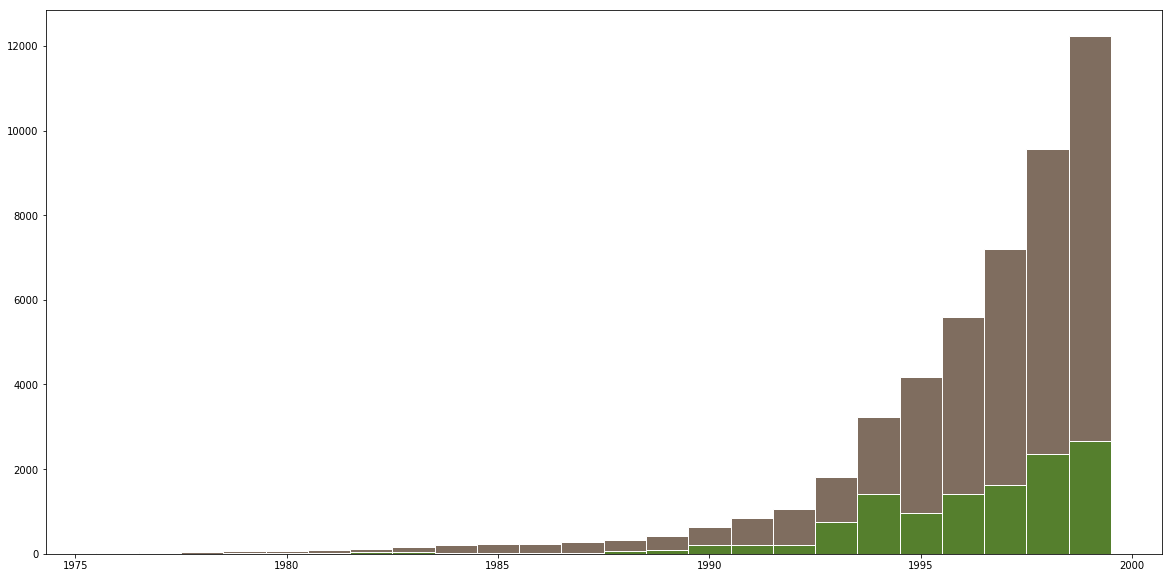

In [143]:
plt.figure(figsize=(20,10))
plt.bar(number_of_years, cumul_list, color='#7f6d5f', edgecolor='white', width=1)
plt.bar(number_of_years, list_of_entry_year, color='#557f2d', edgecolor='white', width=1)#number of entries released per year
